## Introduction
This project (my python code and the accompanying data vizzes) was produced from data found at the UC Irvine Machine Learning Repository created by Rizk and Awad, apparently related to an academic paper published by Hajj, Rizk & Awad in 2018, and originating from The American University in Beirut, Lebanon (all citations appear below). For their work on the 2018 paper (that appears in volume 31 of the journal Neural Computing and Applications), they curated text from precisely 1,000 sport-related articles that all appeared on the internet from between around late 2011 to late 2013. 

The researchers then processed the data in a couple of different ways. The (Amazon) Mechanical Turk crowdworker website was used to provide a label to the articles, categorizing them discreetly as either objective or subjective. In addition to MTurk labelling, the articles were also processed using Princeton University’s WordNet lexical resource. The result of this was to provide a score that is a numerical rating of the individual article’s level of objectivity or subjectivity, whichever the case may be. A little background:

WordNet is a form of data processing that finds semantic relationships among words - degrees of near meaning, specific forms of generic terms, part-of relationships to that of which would be considered “the whole”, etc. These relationships define groups of words called synonym rings, or synsets. Synsets can then be assigned numerical values based upon their inherent neutrality (objectivity) or lack thereof: positive or negative connotation. The specific scoring rules are defined by an opinion-mining resource known as SentiWordNet with the collective result being to ascribe a type of n-gram document polarity.

The provenance of these tools is the work of cognitive psychology pioneers funded by Naval Research and DARPA going back to the mid-1980s (yet another decades old A.I. artifact released into the wild). Today, there are readily accessible software tools that serve to further linguistic processing research and development. Two examples are NLTK - natural language toolkit - written in Python, and the open-source spaCy library written in Python and Cython. spaCy was barely three years old at the time that the Hajj paper mentioned above was published.

In my graphs, I inserted the terms “Objectivity Sentiment Score” and Subjectivity Sentiment Score” for the names semanticobjscore and semanticsubjscoreto that the researchers used with their respective definitions: “Frequency of words with an objective SENTIWORDNET score” and “Frequency of words with a subjective SENTIWORDNET score”.

#### Here is a List of Background Citations
UCI MLR. Link and accompanying citation:
https://archive.ics.uci.edu/dataset/450/sports+articles+for+objectivity+analysis
Rizk, Y. & Awad, M. (2018). Sports articles for objectivity analysis [Dataset]. UCI Machine Learning 
Repository. https://doi.org/10.24432/C5801R.

Link and citation for the associated paper:
https://link.springer.com/article/10.1007/s00521-018-3549-3
Hajj, N., Rizk, Y. & Awad, M. A subjectivity classification framework for sports articles using 
improved cortical algorithms. Neural Comput & Applic 31, 8069–8085 (2019). 
https://doi.org/10.1007/s00521-018-3549-3

The Amazon Mechanical Turk:
https://www.mturk.com/

WordNet:
https://wordnet.princeton.edu/news-0
https://wordnet.princeton.edu/download
https://www.cs.princeton.edu/courses/archive/spring21/cos226/assignments/wordnet/specification.php

Global WordNets (other than English):
https://globalwordnet.org/resources/wordnets-in-the-world

Background on SentiWordNet:
https://github.com/aesuli/SentiWordNet/tree/master
	papers/LREC06.pdf
https://notebook.community/AC209ConsumerConfidence/AC209ConsumerConfidence.github.io/SentiWordNet


---
Begin with library imports.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import and preview to create the df.

In [178]:
#article_features = pd.read_csv("article_features.csv")
#article_features.head()
#article_features.tail()
#article_features.describe()
#article_features.info()
#article_features.isnull()
#article_features.CD.describe().all
#print(article_features.semanticobjscore.describe())
#print(article_features.semanticsubjscore.describe())
article_features.JJS.describe()
print(article_features.RBS.value_counts())

RBS
0     197
1     191
2     123
4     101
3     100
5      70
6      68
7      43
8      28
9      20
12     15
10     14
11     12
13      6
14      3
19      2
17      2
22      1
16      1
32      1
18      1
15      1
Name: count, dtype: int64


Initial Insights:
- There appear to be no missing values.
- There are 1,000 rows plus a header (one row for each article).
- There are 62 columns that include MTurk label, SENTIWORDNET word score, frequecies of parts of speech, source, word count, complexity score, and a pointer to a specific text file.
- All but source, article pointer and MTurk label are integer values.
- A single spot-check told me the word count columns may be unreliable - I haven't yet been able to discern which tasks were left to the MTurk worker.
- The names of the text files appear to be an exact match for the TextID column items. 

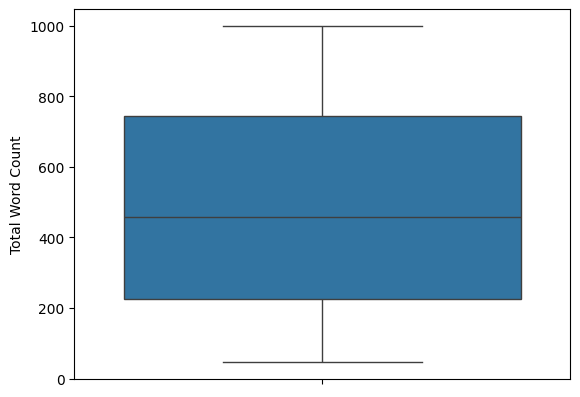

In [100]:
#plt.figure()
#sns.boxplot(article_features['totalWordsCount'])
features2 = article_features[(article_features.totalWordsCount < 1000) & (article_features.totalWordsCount > 0)]
plt.figure()
sns.boxplot(features2['totalWordsCount'])
plt.ylabel('Total Word Count')
plt.show()

The majority of the articles are less than 1.000 words in length.  
When I filter for word count between zero and 1,ooo words or so, the median goes below 500 words.

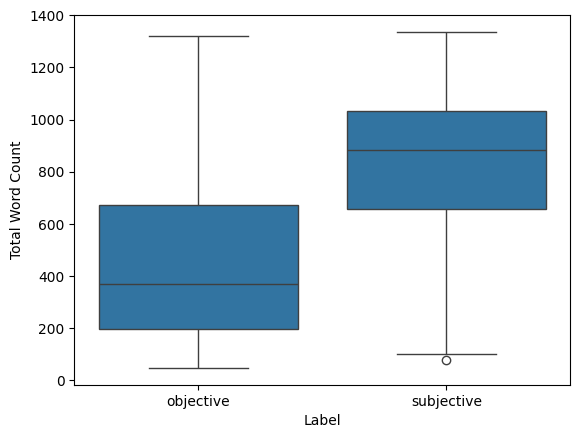

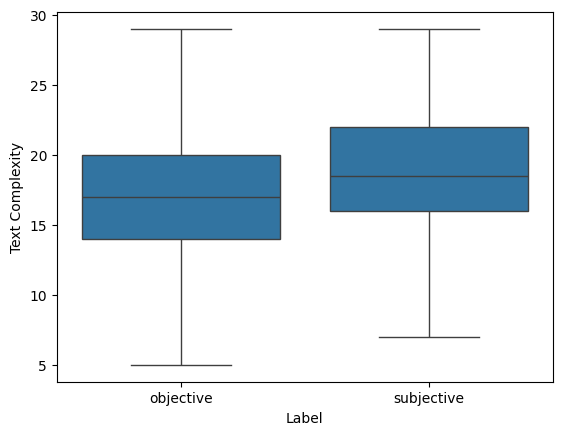

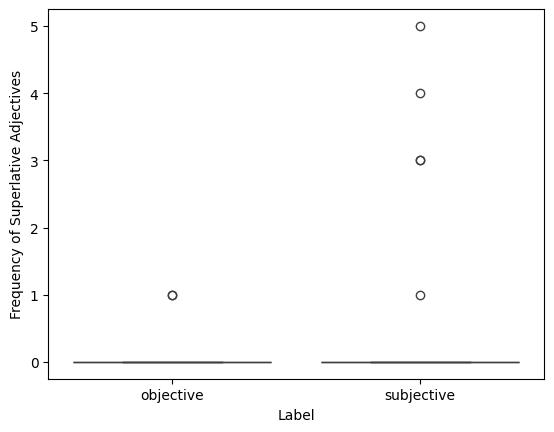

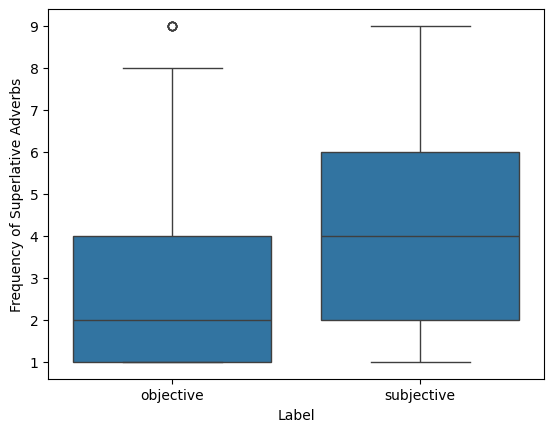

In [101]:
features2 = article_features[(article_features.totalWordsCount < 1350) & (article_features.totalWordsCount > 0)]
plt.figure()
sns.boxplot(x=article_features['Label'], y=features2['totalWordsCount'])
plt.ylabel('Total Word Count')
plt.show()

features2 = article_features[(article_features.txtcomplexity < 30) & (article_features.txtcomplexity > 0)]
plt.figure()
sns.boxplot(x=article_features['Label'], y=features2['txtcomplexity'])
plt.ylabel('Text Complexity')
plt.show()

plt.figure()
sns.boxplot(x=article_features['Label'], y=article_features['JJS'])
plt.ylabel('Frequency of Superlative Adjectives')
plt.show()

features2 = article_features[(article_features.RBS < 10) & (article_features.RBS > 0)]
plt.figure()
sns.boxplot(x=article_features['Label'], y=features2['RBS'])
plt.ylabel('Frequency of Superlative Adverbs')
plt.show()

So the fewer the words, the more objective the article.  
The given **Text Complexity Score** doesn't seem to present a strong influence on the MTurk label.  
While there's a paucity of **Superlative Adjectives**, the positive correlation between the presence of Adverbs and Subjectivity is one of the strongest conclusions I've found throughout this entire project. It's logical in the sense that adverbs modify action words as well as adjectives, and action words could be considered a staple of sports journalism. Based on the crowdworker's input, the more **Superlative Adverbs**, the more Subjectivity.
  
Some parts of speech that may be noteworthy include:
- CD - Frequency of numerals and cardinals
- JJ - Frequency of ordinal adjectives or numerals
- JJR - Frequency of comparative adjectives
- JJS - Frequency of superlative adjectives
- LS - Frequency of list item markers
- NNP - Frequency of singular proper nouns
- NNPS - Frequency of plural proper nouns
- PRP - Frequency of personal pronouns
- RBS - Frequency of superlative adverbs
- Quotes
- compsupadjadv - Frequency of comparative and superlative adjectives and adverbs
- txtcomplexity - Text complexity score

Later I consider how to view **semanticobjscore** and **semanticsubjscore** with respect to MTurk Labels to see how they're differentiated.

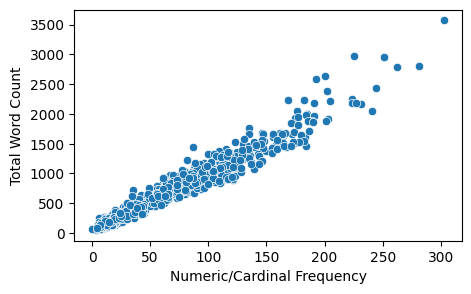

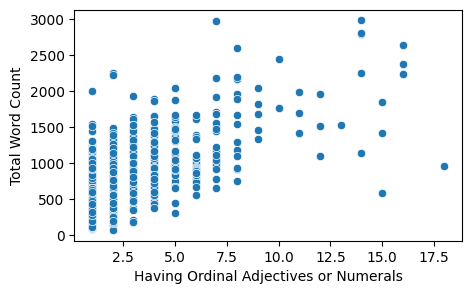

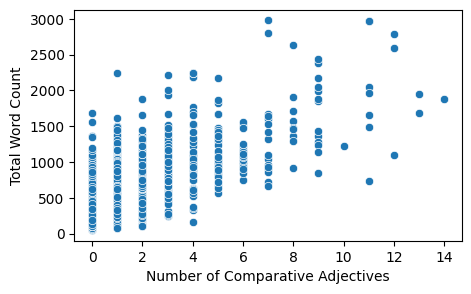

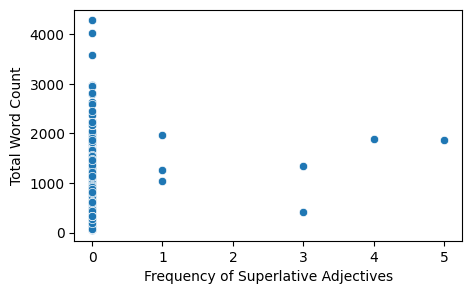

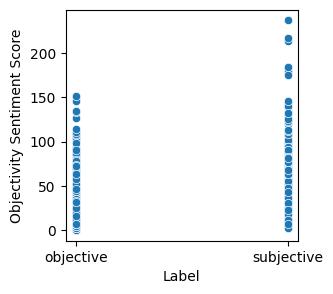

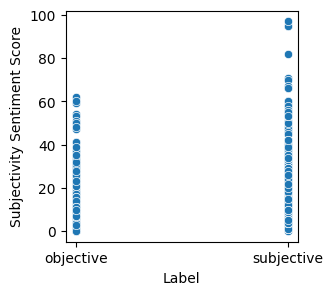

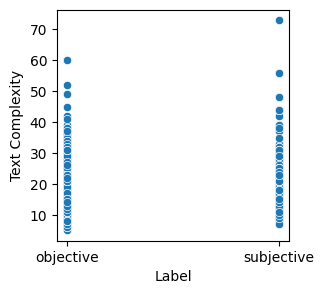

In [102]:
features2 = article_features[(article_features.totalWordsCount < 3900) & (article_features.totalWordsCount > 0)]
plt.figure(figsize = (5,3))
sns.scatterplot(data=features2, x='CD', y='totalWordsCount')
plt.xlabel('Numeric/Cardinal Frequency')
plt.ylabel('Total Word Count')
plt.show()

features2 = article_features[(article_features.totalWordsCount < 3200) & (article_features.totalWordsCount > 0)]
features2 = features2[(features2.JJ < 24) & (features2.JJ > 0)]
plt.figure(figsize = (5,3))
sns.scatterplot(data=features2, x='JJ', y='totalWordsCount')
plt.xlabel('Having Ordinal Adjectives or Numerals')
plt.ylabel('Total Word Count')
plt.show()

features2 = article_features[(article_features.totalWordsCount < 3200) & (article_features.totalWordsCount > 0)]
plt.figure(figsize = (5,3))
sns.scatterplot(data=features2, x='JJR', y='totalWordsCount')
plt.xlabel('Number of Comparative Adjectives')
plt.ylabel('Total Word Count')
plt.show

plt.figure(figsize = (5,3))
sns.scatterplot(data=article_features, x='JJS', y='totalWordsCount')
plt.xlabel('Frequency of Superlative Adjectives')
plt.ylabel('Total Word Count')
plt.show()

plt.figure(figsize = (3,3))
sns.scatterplot(data=article_features, x='Label', y='semanticobjscore')
plt.ylabel('Objectivity Sentiment Score')
plt.show()

plt.figure(figsize = (3,3))
sns.scatterplot(data=article_features, x='Label', y='semanticsubjscore')
plt.ylabel('Subjectivity Sentiment Score')
plt.show()

plt.figure(figsize = (3,3))
sns.scatterplot(data=article_features, x='Label', y='txtcomplexity')
plt.ylabel('Text Complexity')
plt.show()

Cardinal numbers can be considered a useful descriptive in sports articles, and so we see the correlation above with word count... up to a point. Perhaps the dimishing usage is an attribute of the author trying to write something both enjoyable and in many respects readable, as opposed to putting out something that looks like a book report, or a think tank paper.  

Then we observe the specific frequency of the use of **Ordinal Adjectives or Numerals**. For articles of all lengths, authors tend to peter out on these before we might see 8 or so instances per article. **Frequency of Comparative Adjectives** follows a similar pattern, but with more usage in the higher frequency instances. Perhaps this stands behind the notion that language is more colorful than figures, and comparative devices can be especially informative.  

The 4th graph above again shows the scarce use of **Superlative Adjectives**, showing up zero times in most articles. Initially this phenomenon surprised me; I had always imagined that I've seen much more use of these rather loose descriptive devices when I read or listen to sports reporters.

In the **semantic*obj*score** and **semantic*subj*score** scatter plots, you can just see that these are independent of the labels ascribed by the crowd workers. My intention in this project was never to pit the WordNet against the MTurk. The data presented here does not provide for a good experiment of this relationship anyway. However, to gain further insight into the differentiation between the two, I have boxplotted them in the next section below.  

The final graph above once again shows little correlation between **Text Complexity** and neutrality, or lack thereof.

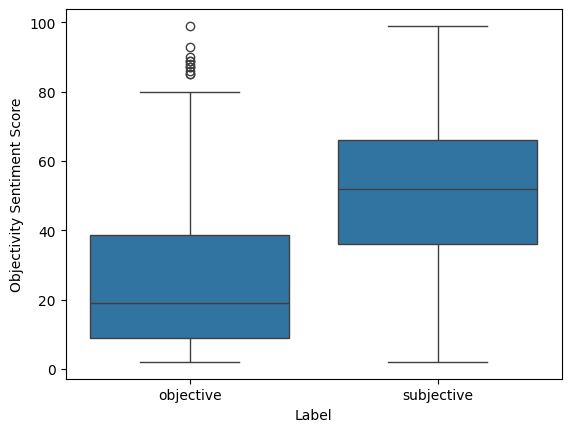

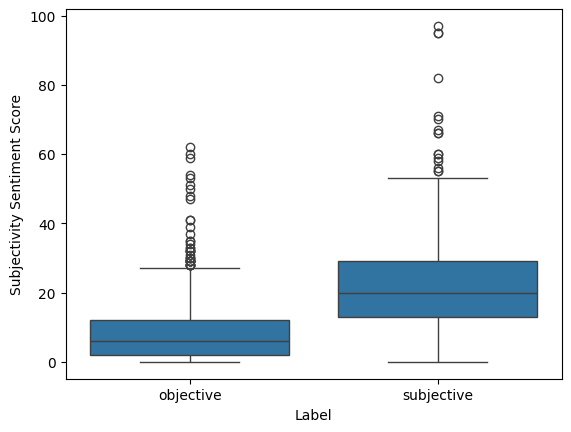

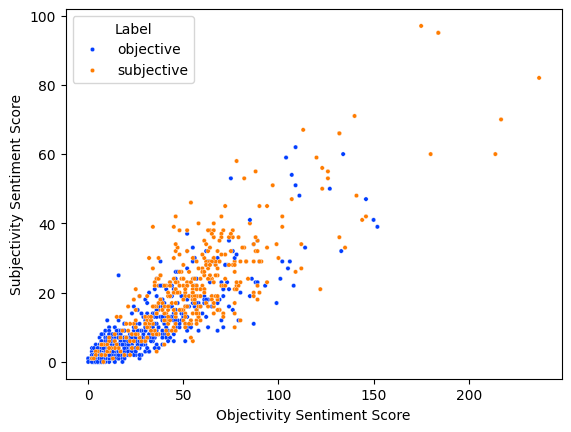

In [124]:
features2 = article_features[(article_features.semanticobjscore < 100) & (article_features.semanticobjscore > 0)]
plt.figure()
#sns.boxplot(x=article_features['Label'], y=article_features['semanticobjscore'])
sns.boxplot(x=features2['Label'], y=features2['semanticobjscore'])
plt.ylabel('Objectivity Sentiment Score')
plt.show()

plt.figure()
sns.boxplot(x=article_features['Label'], y=article_features['semanticsubjscore'])
plt.ylabel('Subjectivity Sentiment Score')
plt.show()

plt.figure()
sns.scatterplot(data=article_features, x='semanticobjscore', y='semanticsubjscore', hue='Label', palette = "bright", s=10)
plt.xlabel('Objectivity Sentiment Score')
plt.ylabel('Subjectivity Sentiment Score')
plt.show()

By filtering the top visualization above for **Objectivity Sentiment Scores** between zero and 100, I've emphasized the much larger standard deviation of the **Objectivity Sentiment Scores** over the **Subjectivity Sentiment Scores**. This also makes it clearer to see how the median of the scores labeled either objective or subjective by the MTurk are both about 20. The SentiWordNet "judgement" is not identical to that of the MTurk, but this may be the best evidence within this dataset that the two don't differ by a heck of a lot either.  

In the scatter plot immediately above, I have not normalized the scales. Therefore the relative linearity of the plot means that for any given subjective score, there are twice as many objective scores. The blue dots are more scattered despite their being more orange outliers. What's harder to see here is that the average **Objectivity Sentiment Score** at 39 is three times the average **Subjectivity Sentiment Score**!

In [174]:
#article_features.corr(numeric_only=True)
article_features_new = article_features.drop(['TextID', 'URL', 'CC', 'DT', 'EX', 'FW', 'INs', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'RP', 'SYM', 'TOs', 'VB', 'VBG', 'VBP', 'VBZ', 'WP', 'WRB', 'baseform', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas', 'semicolon', 'colon', 'ellipsis', 'imperative', 'present3rd', 'present1st2nd', 'sentence1st', 'sentencelast'], axis=1)
article_features_new.corr(numeric_only=True)

,totalWordsCount,semanticobjscore,semanticsubjscore,CD,JJ,JJR,PRP,PRP$,RB,RBR,...,VBN,WDT,WP$,Quotes,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,txtcomplexity
totalWordsCount,1.000000,0.963404,0.891406,0.975290,0.696009,0.702140,0.840559,0.915115,0.564324,0.412125,...,0.791598,0.716116,0.726568,0.057361,0.501285,0.564170,0.802912,0.825779,0.744135,0.235470
semanticobjscore,0.963404,1.000000,0.871214,0.946215,0.702583,0.671417,0.805653,0.894654,0.569391,0.389298,...,0.765968,0.670108,0.673734,0.035120,0.479186,0.541955,0.766382,0.814398,0.699873,0.208934
semanticsubjscore,0.891406,0.871214,1.000000,0.861600,0.618023,0.611029,0.787970,0.876879,0.514826,0.395686,...,0.789546,0.708080,0.676588,-0.035679,0.526340,0.580988,0.737595,0.735763,0.618033,0.195587
CD,0.975290,0.946215,0.861600,1.000000,0.680140,0.684767,0.775986,0.887796,0.560227,0.406145,...,0.767640,0.691437,0.699109,0.042532,0.466721,0.545922,0.752024,0.808990,0.724360,0.237732
JJ,0.696009,0.702583,0.618023,0.680140,1.000000,0.518882,0.578256,0.655349,0.558920,0.276110,...,0.581545,0.479482,0.498883,-0.007403,0.299160,0.426286,0.558371,0.878839,0.412257,0.159862
JJR,0.702140,0.671417,0.611029,0.684767,0.518882,1.000000,0.601060,0.631091,0.374734,0.331937,...,0.566885,0.516353,0.511497,-0.008925,0.292552,0.372786,0.583364,0.804353,0.456269,0.102180
PRP,0.840559,0.805653,0.787970,0.775986,0.578256,0.601060,1.000000,0.789127,0.444711,0.329227,...,0.633145,0.610011,0.640443,0.113256,0.457576,0.495908,0.828328,0.685820,0.691417,0.153556
PRP$,0.915115,0.894654,0.876879,0.887796,0.655349,0.631091,0.789127,1.000000,0.578468,0.356589,...,0.820631,0.743730,0.757419,-0.006570,0.522347,0.638492,0.801179,0.771974,0.660642,0.227435
RB,0.564324,0.569391,0.514826,0.560227,0.558920,0.374734,0.444711,0.578468,1.000000,0.228860,...,0.494458,0.431406,0.466414,-0.011655,0.281552,0.398881,0.465032,0.702144,0.383879,0.179237
RBR,0.412125,0.389298,0.395686,0.406145,0.276110,0.331937,0.329227,0.356589,0.228860,1.000000,...,0.300548,0.335977,0.282237,-0.045905,0.138731,0.148097,0.334710,0.471754,0.225984,0.083474


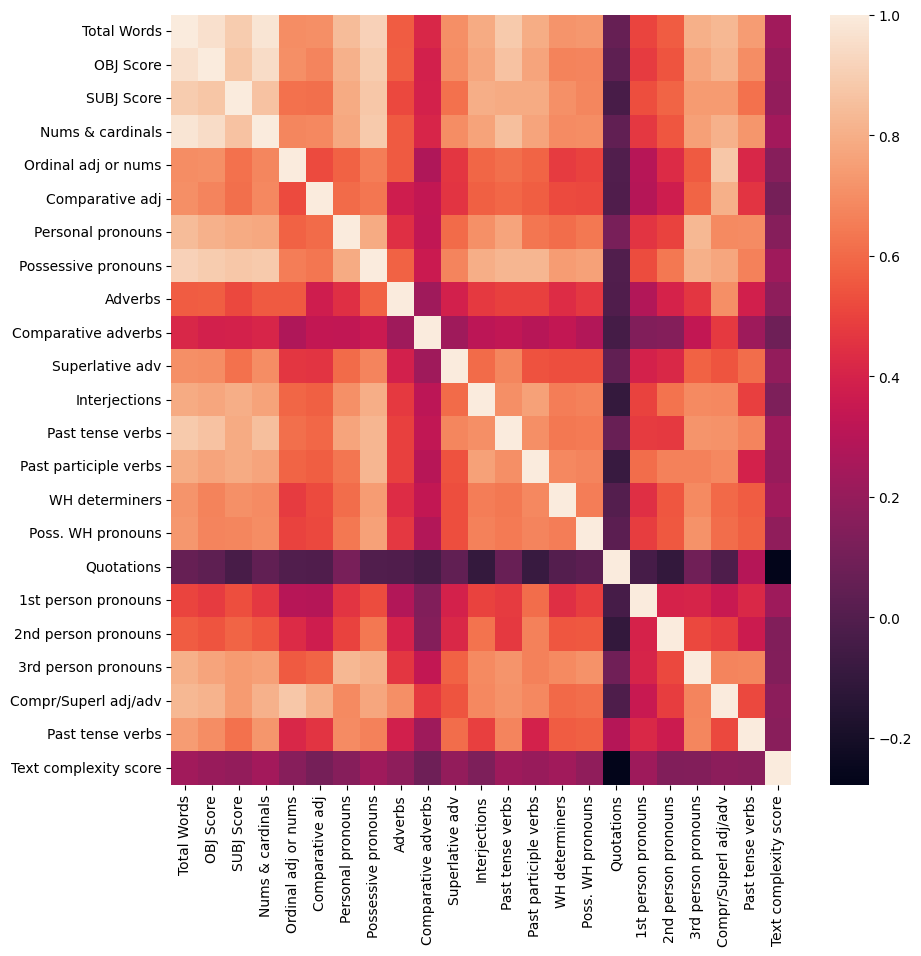

In [175]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(data=article_features_new.corr(numeric_only=True))
ax.set_xticklabels(['Total Words', 'OBJ Score', 'SUBJ Score','Nums & cardinals','Ordinal adj or nums','Comparative adj','Personal pronouns','Possessive pronouns','Adverbs','Comparative adverbs','Superlative adv','Interjections','Past tense verbs','Past participle verbs','WH determiners','Poss. WH pronouns','Quotations','1st person pronouns','2nd person pronouns','3rd person pronouns','Compr/Superl adj/adv','Past tense verbs','Text complexity score'])
ax.set_yticklabels(['Total Words', 'OBJ Score', 'SUBJ Score','Nums & cardinals','Ordinal adj or nums','Comparative adj','Personal pronouns','Possessive pronouns','Adverbs','Comparative adverbs','Superlative adv','Interjections','Past tense verbs','Past participle verbs','WH determiners','Poss. WH pronouns','Quotations','1st person pronouns','2nd person pronouns','3rd person pronouns','Compr/Superl adj/adv','Past tense verbs','Text complexity score'])
plt.show()

I created the correlation table above along with the corresponding heatmaps in order to glean whatever other insights I could about, and between, the chosen subset of parts-of-speech.  

---

I have spent a lot of time examining this dataset. I've discovered many interesting facts and disspelled more than a few of my own preconceived notions. I am a sports fan and I have enjoyed the fact that this dataset can provide a global perspective when filtered in certain ways. Otherwise, my own biases are revealed by the lens through which I choose view the data. I'm not really into car or horse racing, for instance, and I will watch English football infrequently. This led me to consciously focus on satisfying my curiousity about a few things for the remainder of this project. 

So in the final code segments below, I chose to create some very small file sets as samples to see whether or not the MTurk evaluators detected journalistic bias for a few select categorical areas. These areas are: 
- Gender - I chose a few articles about the WNBA, women's downhill skiing, and women's tennis.
- The Feats and Opinions of a Superstar - I chose Kobe Bryant.*
- Controversial English Footballers - These include John Terry, Ryan Giggs and - of course - Joey Barton.
- Teams that Elicit Strong Feelings - The New England Patriots in this particular era.
- Teams that Elicit Strong Feelings - I was the lone Raiders fan in a household of Pats fans... at least until Brady left for Tampa Bay. Boo!
- The Kansas City Chiefs, both without, and then with references to Jovan Belcher.**

\* Due to the circumscribed dates of article curation described above in the project introduction, the entire dataset serves as a sort of mini time capsule. Because of this, I feel quite familiar with certain sporting events, topics and personalities.  
\** This was an unexpected and unique find about the personal tragedy of an NFL player with a neurodegenerative disease, and his team. There were many articles written over the entire period. Prior to the Belcher murder-suicide, the team was not well liked, most especially by its own "fans". At the end of the season, after the terrible events, the Kansas City organization fired its general manager.  


Review the results below.  

 

In [106]:
article_features_gender = article_features.drop(article_features.index[966:])
article_features_gender.drop(article_features_gender.index[605:965], inplace=True)
article_features_gender.drop(article_features_gender.index[509:604], inplace=True)
article_features_gender.drop(article_features_gender.index[408:508], inplace=True)
article_features_gender.drop(article_features_gender.index[328:407], inplace=True)
article_features_gender.drop(article_features_gender.index[125:327], inplace=True)
article_features_gender.drop(article_features_gender.index[0:124], inplace=True)
article_features_gender

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
124,Text0125,http://msn.foxsports.com/wnba/story/Angel-McCo...,objective,133,9,1,10,8,0,2,...,0,3,0,8,0,4,0,1,1,11
327,Text0328,http://edition.cnn.com/2013/03/02/sport/skiing...,objective,206,5,4,17,14,0,2,...,0,2,1,9,3,4,1,1,1,15
407,Text0408,http://msn.foxsports.com/wnba/story/Lauren-Jac...,objective,115,5,4,0,9,0,2,...,0,3,0,5,1,2,0,1,1,19
508,Text0509,http://uk.eurosport.yahoo.com/news/tennis-erra...,objective,442,26,5,28,44,0,17,...,0,13,0,32,1,4,5,1,1,21
604,Text0605,http://www.wnba.com/features/maya_moore_china_...,objective,1002,57,17,24,93,5,20,...,6,28,9,33,3,36,25,0,1,13
965,Text0966,http://espn.go.com/wnba/story/_/id/8334711/wnb...,subjective,1200,61,21,32,102,0,36,...,5,50,5,54,10,39,19,1,1,14


In [107]:
article_features_kobe = article_features.drop(article_features.index[942:])
article_features_kobe.drop(article_features_kobe.index[690:941], inplace=True)
article_features_kobe.drop(article_features_kobe.index[608:689], inplace=True)
article_features_kobe.drop(article_features_kobe.index[411:607], inplace=True)
article_features_kobe.drop(article_features_kobe.index[179:410], inplace=True)
article_features_kobe.drop(article_features_kobe.index[0:178], inplace=True)
article_features_kobe

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
178,Text0179,http://www.nba.com/2013/news/02/21/hinrich-elb...,objective,142,9,1,6,18,0,7,...,0,2,1,2,0,8,4,1,1,14
410,Text0411,http://www.foxsportswest.com/02/21/13/Kobe-say...,objective,545,28,5,14,48,0,11,...,2,18,3,21,3,15,24,1,1,18
607,Text0608,http://www.foxsportswest.com/10/21/12/Lakers-H...,objective,1257,69,18,10,116,3,14,...,8,42,16,66,4,29,15,1,1,32
689,Text0690,http://worldsport.blogs.cnn.com/2013/01/11/how...,subjective,580,41,12,10,73,4,9,...,3,4,3,15,8,18,14,1,1,14
941,Text0942,http://msn.foxsports.com/nba/story/mike-danton...,subjective,1099,61,21,21,110,4,15,...,2,27,16,26,5,47,13,1,1,19


In [108]:
row_1 = article_features.iloc[[86]]
row_2 = article_features.iloc[[224]]
row_3 = article_features.iloc[[334]]
row_4 = article_features.iloc[[400]]
row_5 = article_features.iloc[[618]]
row_6 = article_features.iloc[[706]]
row_7 = article_features.iloc[[770]]
article_features_cef = pd.DataFrame()
article_features_cef = pd.concat([row_1, row_2, row_3, row_4, row_5, row_6, row_7])
article_features_cef

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
86,Text0087,http://www.dailystar.co.uk/football/view/29958...,objective,107,10,2,0,10,0,0,...,0,5,2,3,0,4,0,1,1,8
224,Text0225,http://www.football365.com/news/21554/8446392/2-2,objective,365,20,6,7,35,1,4,...,0,6,1,25,0,2,1,0,1,24
334,Text0335,http://www.football365.com/manchester-united/8...,objective,101,3,1,2,7,0,0,...,0,2,2,4,0,4,0,0,1,10
400,Text0401,http://www.football365.com/manchester-united/8...,objective,148,9,2,4,12,0,1,...,0,6,0,10,0,1,1,1,1,10
618,Text0619,http://www.dailystar.co.uk/posts/view/299361,objective,177,3,4,2,18,0,2,...,0,7,0,5,0,7,1,1,1,8
706,Text0707,http://www.football365.com/mailbox/8434465/-Ma...,subjective,2589,120,59,30,193,5,67,...,13,48,25,31,31,54,97,0,1,22
770,Text0771,http://msn.foxsports.com/foxsoccer/championsle...,subjective,1003,64,25,12,99,4,19,...,4,24,11,19,6,36,26,1,1,18


In [109]:
article_features_pats = article_features.drop(article_features.index[974:])
article_features_pats.drop(article_features_pats.index[969:973], inplace=True)
article_features_pats.drop(article_features_pats.index[858:968], inplace=True)
article_features_pats.drop(article_features_pats.index[660:857], inplace=True)
article_features_pats.drop(article_features_pats.index[632:659], inplace=True)
article_features_pats.drop(article_features_pats.index[0:631], inplace=True)
article_features_pats

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
631,Text0632,http://www.foxsportssouth.com/01/23/13/Top-10-...,objective,1961,134,60,181,191,0,32,...,1,5,27,42,12,18,24,1,1,23
659,Text0660,http://msn.foxsports.com/nfl/story/baltimore-r...,objective,1215,74,35,26,121,3,7,...,9,21,3,74,4,28,19,1,1,21
857,Text0858,http://msn.foxsports.com/nfl/story/afc-nfl-cha...,subjective,1566,112,34,80,159,1,24,...,0,28,17,58,3,39,23,1,1,20
968,Text0969,http://msn.foxsports.com/nfl/story/Tom-Brady-N...,subjective,890,34,39,20,78,0,8,...,2,45,3,29,7,46,16,1,1,14
973,Text0974,http://msn.foxsports.com/nfl/story/new-england...,subjective,1111,81,33,24,97,3,20,...,8,35,17,38,15,52,23,1,1,16


In [110]:
article_features_raiders = article_features.drop(article_features.index[433:])
article_features_raiders.drop(article_features_raiders.index[391:432], inplace=True)
article_features_raiders.drop(article_features_raiders.index[375:390], inplace=True)
article_features_raiders.drop(article_features_raiders.index[27:374], inplace=True)
article_features_raiders.drop(article_features_raiders.index[0:26], inplace=True)
article_features_raiders

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
26,Text0027,http://www.foxsportswest.com/11/08/12/Lane-Kif...,objective,1122,63,29,14,96,4,10,...,14,41,7,33,8,48,20,1,1,22
374,Text0375,http://www.foxsportswest.com/11/17/12/Its-hard...,objective,1313,73,28,25,123,1,12,...,9,47,4,78,8,27,22,1,1,19
390,Text0391,http://msn.foxsports.com/nfl/story/terrelle-pr...,objective,793,47,12,29,79,0,11,...,1,28,3,42,14,17,7,1,1,25
432,Text0433,http://msn.foxsports.com/nfl/story/atlanta-fal...,objective,223,13,4,6,21,0,5,...,0,5,1,7,0,7,2,1,1,15


In [111]:
article_features_kccBefore = article_features.drop(article_features.index[926:])
article_features_kccBefore.drop(article_features_kccBefore.index[795:925], inplace=True)
article_features_kccBefore.drop(article_features_kccBefore.index[438:794], inplace=True)
article_features_kccBefore.drop(article_features_kccBefore.index[0:437], inplace=True)
article_features_kccBefore

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
437,Text0438,http://msn.foxsports.com/nfl/story/scott-pioli...,objective,344,17,5,9,32,1,5,...,0,6,1,14,1,6,2,1,1,16
794,Text0795,http://msn.foxsports.com/nfl/story/whitlock-nf...,subjective,1275,72,45,31,111,0,25,...,4,42,7,46,12,37,30,1,1,14
925,Text0926,http://msn.foxsports.com/nfl/story/whitlock-ka...,subjective,1038,64,33,17,105,1,21,...,7,19,11,24,14,41,32,1,1,15


In [112]:
article_features_kccB4andAfter = article_features.drop(article_features.index[926:])
article_features_kccB4andAfter.drop(article_features_kccB4andAfter.index[850:925], inplace=True)
article_features_kccB4andAfter.drop(article_features_kccB4andAfter.index[795:849], inplace=True)
article_features_kccB4andAfter.drop(article_features_kccB4andAfter.index[607:794], inplace=True)
article_features_kccB4andAfter.drop(article_features_kccB4andAfter.index[603:606], inplace=True)
article_features_kccB4andAfter.drop(article_features_kccB4andAfter.index[438:602], inplace=True)
article_features_kccB4andAfter.drop(article_features_kccB4andAfter.index[78:437], inplace=True)
article_features_kccB4andAfter.drop(article_features_kccB4andAfter.index[0:77], inplace=True)
article_features_kccB4andAfter

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
77,Text0078,http://msn.foxsports.com/nfl/story/jovan-belch...,objective,1197,56,22,12,126,0,8,...,1,36,4,90,3,15,7,1,1,15
437,Text0438,http://msn.foxsports.com/nfl/story/scott-pioli...,objective,344,17,5,9,32,1,5,...,0,6,1,14,1,6,2,1,1,16
602,Text0603,http://msn.foxsports.com/nfl/story/jovan-belch...,subjective,820,51,14,9,67,1,5,...,4,28,7,23,6,16,20,1,1,17
606,Text0607,http://nmsn.foxsports.com/nfl/story/kansas-cit...,objective,1086,46,12,34,122,1,5,...,0,25,3,78,4,7,16,1,1,19
794,Text0795,http://msn.foxsports.com/nfl/story/whitlock-nf...,subjective,1275,72,45,31,111,0,25,...,4,42,7,46,12,37,30,1,1,14
849,Text0850,http://msn.foxsports.com/nfl/story/jason-whitl...,subjective,1684,78,58,9,166,4,50,...,5,24,9,49,17,51,43,1,1,17
925,Text0926,http://msn.foxsports.com/nfl/story/whitlock-ka...,subjective,1038,64,33,17,105,1,21,...,7,19,11,24,14,41,32,1,1,15


In [176]:
#print(article_features.Label.describe().all)
#print(article_features.Label['objective'].freq())
#print(article_features.Label.unique())
raw_pct = article_features['Label'].value_counts()['objective'] / article_features.Label.count()
#print(article_features.Label.count())
#print(article_features['Label'].value_counts()['objective'])
print('Overall: ' + str(raw_pct * 100) + '% of the 1,000 articles evaluated were evaluated as Objective')
print()
#print(article_features_gender.Label.describe().all)
raw_pct = article_features_gender['Label'].value_counts()['objective'] / article_features_gender.Label.count()
print('for Gender ' + str(round(raw_pct * 100, 1)) + '% Objective.  (These are small samples.)')
print()
#print(article_features_kobe.Label.describe().all)
raw_pct = article_features_kobe['Label'].value_counts()['objective'] / article_features_kobe.Label.count()
print('for Articles that focused on a Superstar ' + str(round(raw_pct * 100, 1)) + '% Objective')
print()
#print(article_features_cef.Label.describe().all)
raw_pct = article_features_cef['Label'].value_counts()['objective'] / article_features_cef.Label.count()
print('articles about controversial English footballers ' + str(round(raw_pct * 100, 1)) + '% Objective.  Really!')
print()
#print(article_features_pats.Label.describe().all)  #SUBJ
raw_pct = article_features_pats['Label'].value_counts()['subjective'] / article_features_pats.Label.count()
print('articles about the New England Patriots in this era ' + str(round(raw_pct * 100, 1)) + '% Subjective')
print()
#print(article_features_raiders.Label.describe().all)  #OBJ
raw_pct = article_features_raiders['Label'].value_counts()['objective'] / article_features_raiders.Label.count()
print('articles about the Raiders ' + str(round(raw_pct * 100, 1)) + '% Objective.  Funny, to me.')
print()
#print(article_features_kccBefore.Label.describe().all)  #SUBJ
raw_pct = article_features_kccBefore['Label'].value_counts()['subjective'] / article_features_kccBefore.Label.count()
print('articles about the Kansas City Chiefs in this era and not relating to Jovan Belcher ' + str(round(raw_pct * 100, 1)) + '% Subjective')
print()
#print(article_features_kccB4andAfter.Label.describe().all)  #SUBJ
raw_pct = article_features_kccB4andAfter['Label'].value_counts()['subjective'] / article_features_kccB4andAfter.Label.count()
print('articles about the Chiefs both before and after the Jovan Belcher tragedy: ' + str(round(raw_pct * 100, 1)) + '% Subjective')

Overall: 63.5% of the 1,000 articles evaluated were evaluated as Objective

for Gender 83.3% Objective.  (These are small samples.)

for Articles that focused on a Superstar 60.0% Objective

articles about controversial English footballers 71.4% Objective.  Really!

articles about the New England Patriots in this era 60.0% Subjective

articles about the Raiders 100.0% Objective.  Funny, to me.

articles about the Kansas City Chiefs in this era and not relating to Jovan Belcher 66.7% Subjective

articles about the Chiefs both before and after the Jovan Belcher tragedy: 57.1% Subjective


## Conclusion
I would argue that sports journalism has always been frequently laced with opinion. At times raucous opinion. It also envelopes satire, humor, and, of course, strong feelings about the home team as well as the rival.
Extended team dominance can exhibit dynastic proportions. Unique athletes with God-given talent become legends. Outspoken personalities, including managers, coaches and owners, can become ever present and larger than life. These phenomena also elicit strong feelings among the press and the fanbase.
To complicate matters further, sport, celebrity media, and criminal reportage are melded together more and more in our current age of social media influencers and online betting. The target audience for sports journalism is evolving.

So naturally, there are facets of society which would tend to inject bias when it comes to sports and sports reporting. I tried to look at these as well as certain parts of speech that we might think would have a closer association with a favorite team or player, at the expense of a rival competitor.

